In [ ]:
import pandas as pd

In [ ]:
#mount with drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Food_data.csv')#(df(dataframe) is that format which undertood to pandas )
df

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,2,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,3,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,4,7/18/2022,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT
...,...,...,...,...,...,...,...,...,...,...,...
1817,1817,3/29/2022,395.0,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS
1818,1818,11/27/2022,483.0,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy
1819,1819,4/12/2023,243.0,11,28.870946,70.508404,2,0,19.767203,Intermediate,MeAt
1820,1820,2/14/2022,406.0,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT


In [ ]:
df.shape  #rows and then column

(1822, 11)

In [ ]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1822 non-null   int64  
 1   date              1822 non-null   object 
 2   meals_served      1790 non-null   float64
 3   kitchen_staff     1804 non-null   object 
 4   temperature_C     1822 non-null   float64
 5   humidity_percent  1806 non-null   float64
 6   day_of_week       1822 non-null   int64  
 7   special_event     1822 non-null   object 
 8   past_waste_kg     1806 non-null   float64
 9   staff_experience  1485 non-null   object 
 10  waste_category    1801 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 156.7+ KB


# **Data types inconsistencies**

In [ ]:
#convert full column in numeric
df['kitchen_staff'] = pd.to_numeric(df['kitchen_staff'].replace({'ten': 10, 'eleven': 11}), errors='coerce')

In [ ]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1822 non-null   int64  
 1   date              1822 non-null   object 
 2   meals_served      1790 non-null   float64
 3   kitchen_staff     1800 non-null   float64
 4   temperature_C     1822 non-null   float64
 5   humidity_percent  1806 non-null   float64
 6   day_of_week       1822 non-null   int64  
 7   special_event     1822 non-null   object 
 8   past_waste_kg     1806 non-null   float64
 9   staff_experience  1485 non-null   object 
 10  waste_category    1801 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 156.7+ KB


# **Data Cleaning**


In [ ]:
#***************************************1.1  check for missing values********************************************************************

In [ ]:
missing_values=df.isnull().sum()
print("Missing Values", missing_values)

missing_value_percentage= (missing_values/len(df))  * 100
print("Missing values in percentage",missing_value_percentage )


#benchmark is if missingdata> 50% the  drop colum

Missing Values ID                    0
date                  0
meals_served         32
kitchen_staff        22
temperature_C         0
humidity_percent     16
day_of_week           0
special_event         0
past_waste_kg        16
staff_experience    337
waste_category       21
dtype: int64
Missing values in percentage ID                   0.000000
date                 0.000000
meals_served         1.756312
kitchen_staff        1.207464
temperature_C        0.000000
humidity_percent     0.878156
day_of_week          0.000000
special_event        0.000000
past_waste_kg        0.878156
staff_experience    18.496158
waste_category       1.152580
dtype: float64


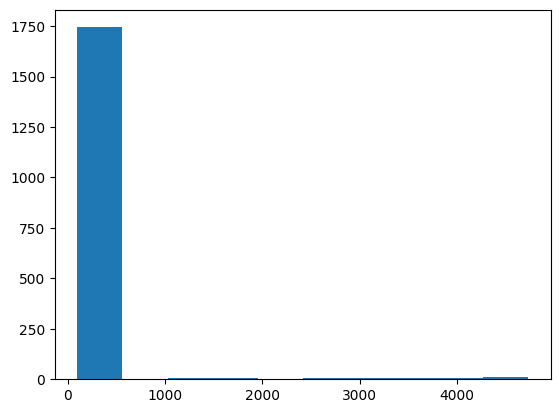

<ipython-input-66-268cc017b2de>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['meals_served'].fillna(df['meals_served'].median(), inplace=True)


In [ ]:
#meal_Served imputation---continous ----shape of data
df['meals_served'].value_counts()

import matplotlib.pyplot as plt
plt.hist(df['meals_served'])
plt.show()

# data-- left skewed-- median
df['meals_served'].fillna(df['meals_served'].median(), inplace=True)

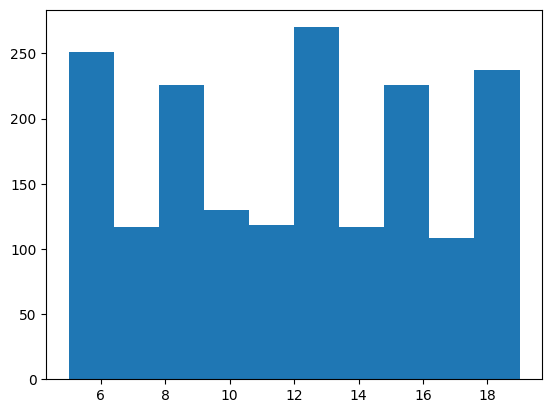

<ipython-input-67-ad01928d2a99>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['kitchen_staff'].fillna(df['kitchen_staff'].mode()[0], inplace=True)


In [ ]:
#kitchen_staff imputation---numeric continuous

df['kitchen_staff'].value_counts()

import matplotlib.pyplot as plt
plt.hist(df['kitchen_staff'])
plt.show()

# data--normally skewed-- mode
df['kitchen_staff'].fillna(df['kitchen_staff'].mode()[0], inplace=True)


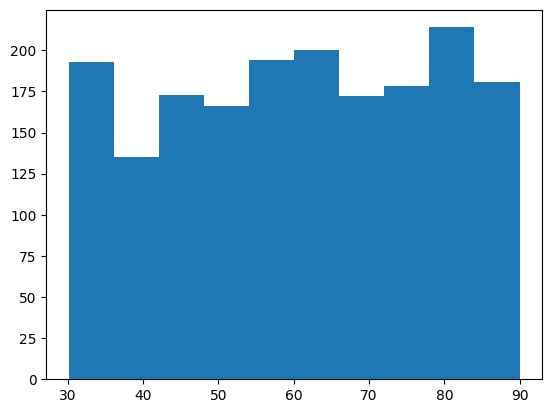

<ipython-input-68-19e6f8e67df2>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['humidity_percent'].fillna(df['humidity_percent'].mode()[0], inplace=True)


In [ ]:
#humidity_percent imputation---Numeric discrete
#histogram

import matplotlib.pyplot as plt
plt.hist(df['humidity_percent'])
plt.show()


# just visulaize which one is better median or mode
df['humidity_percent'].mode()
df['humidity_percent'].median()

#data--normal-- mode
df['humidity_percent'].fillna(df['humidity_percent'].mode()[0], inplace=True)


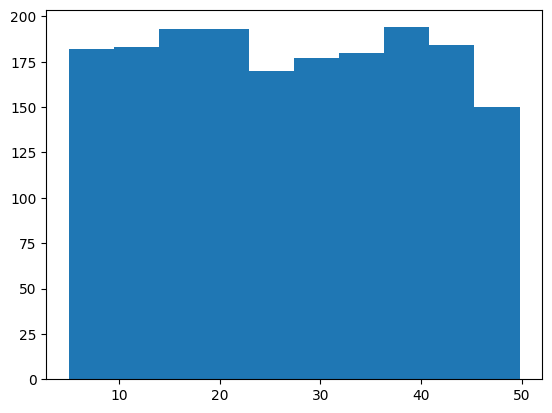

<ipython-input-69-682493aedce5>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['past_waste_kg'].fillna(df['past_waste_kg'].mode()[0], inplace=True)


In [ ]:
#past_waste_kg imputation---Numeric continous
#histogram

import matplotlib.pyplot as plt
plt.hist(df['past_waste_kg'])
plt.show()

df['past_waste_kg'].fillna(df['past_waste_kg'].mode()[0], inplace=True)

In [ ]:
#staff_experience imputation---categorical ordinal --- unknown used
df['staff_experience'].value_counts()

#Handle rare or unclear categories "Pro"
df['staff_experience'] = df['staff_experience'].replace({'Intermediate': 'intermediate'})


df['staff_experience'] = df['staff_experience'].fillna('Unknown')


In [ ]:
#waste_category imputation---categorical Nominal --- unknown used
df['waste_category'].value_counts()

df['waste_category'] = df['waste_category'].replace({'MeAt': 'MEAT'})

df['waste_category'].fillna(df['waste_category'].mode()[0], inplace=True)

<ipython-input-74-a41c6ec415e5>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['waste_category'].fillna(df['waste_category'].mode()[0], inplace=True)


# **Duplicates**

In [ ]:
#finds duplicates
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [ID, date, meals_served, kitchen_staff, temperature_C, humidity_percent, day_of_week, special_event, past_waste_kg, staff_experience, waste_category]
Index: []


# **Exploratory Data Analysis (EDA)**

In [ ]:
###########################################   Summary Statistics ###################################################################
df.describe()


,ID,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,past_waste_kg
count,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.00000,1822.000000
mean,910.500000,372.327113,11.909989,22.189280,60.522873,3.01427,26.830368
std,526.110413,490.505492,4.269558,8.919939,17.484150,2.00899,12.858876
min,0.000000,100.000000,5.000000,-10.372207,30.121111,0.00000,5.008394
25%,455.250000,212.250000,8.000000,15.684259,45.362854,1.00000,15.565114
50%,910.500000,306.000000,12.000000,22.115040,61.514385,3.00000,26.577480
75%,1365.750000,405.750000,15.000000,28.807494,75.755784,5.00000,37.978663
max,1821.000000,4730.000000,19.000000,60.000000,89.982828,6.00000,49.803703


In [ ]:
###########################################   Visualizations ###################################################################

In [ ]:
###########################################  Histograms ###################################################################


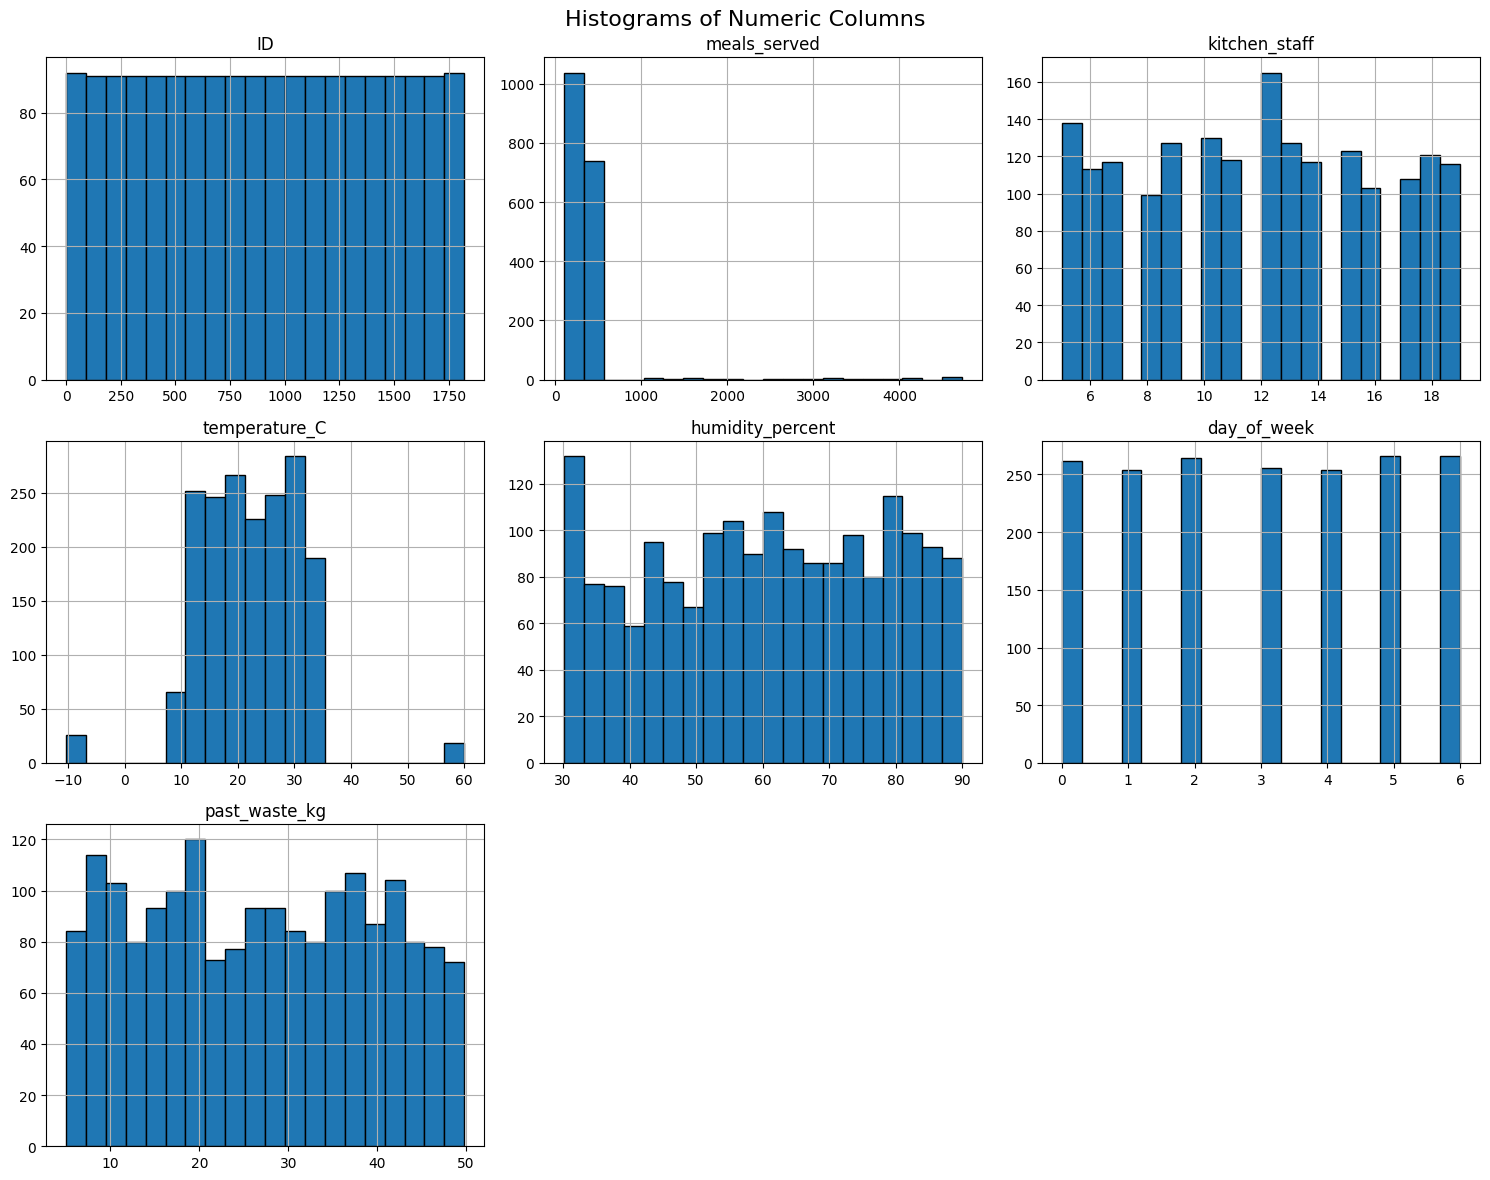

In [ ]:
df.hist(bins=20, figsize=(15, 12), edgecolor='black')
plt.suptitle('Histograms of Numeric Columns', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
###########################################  Box Plots ###################################################################

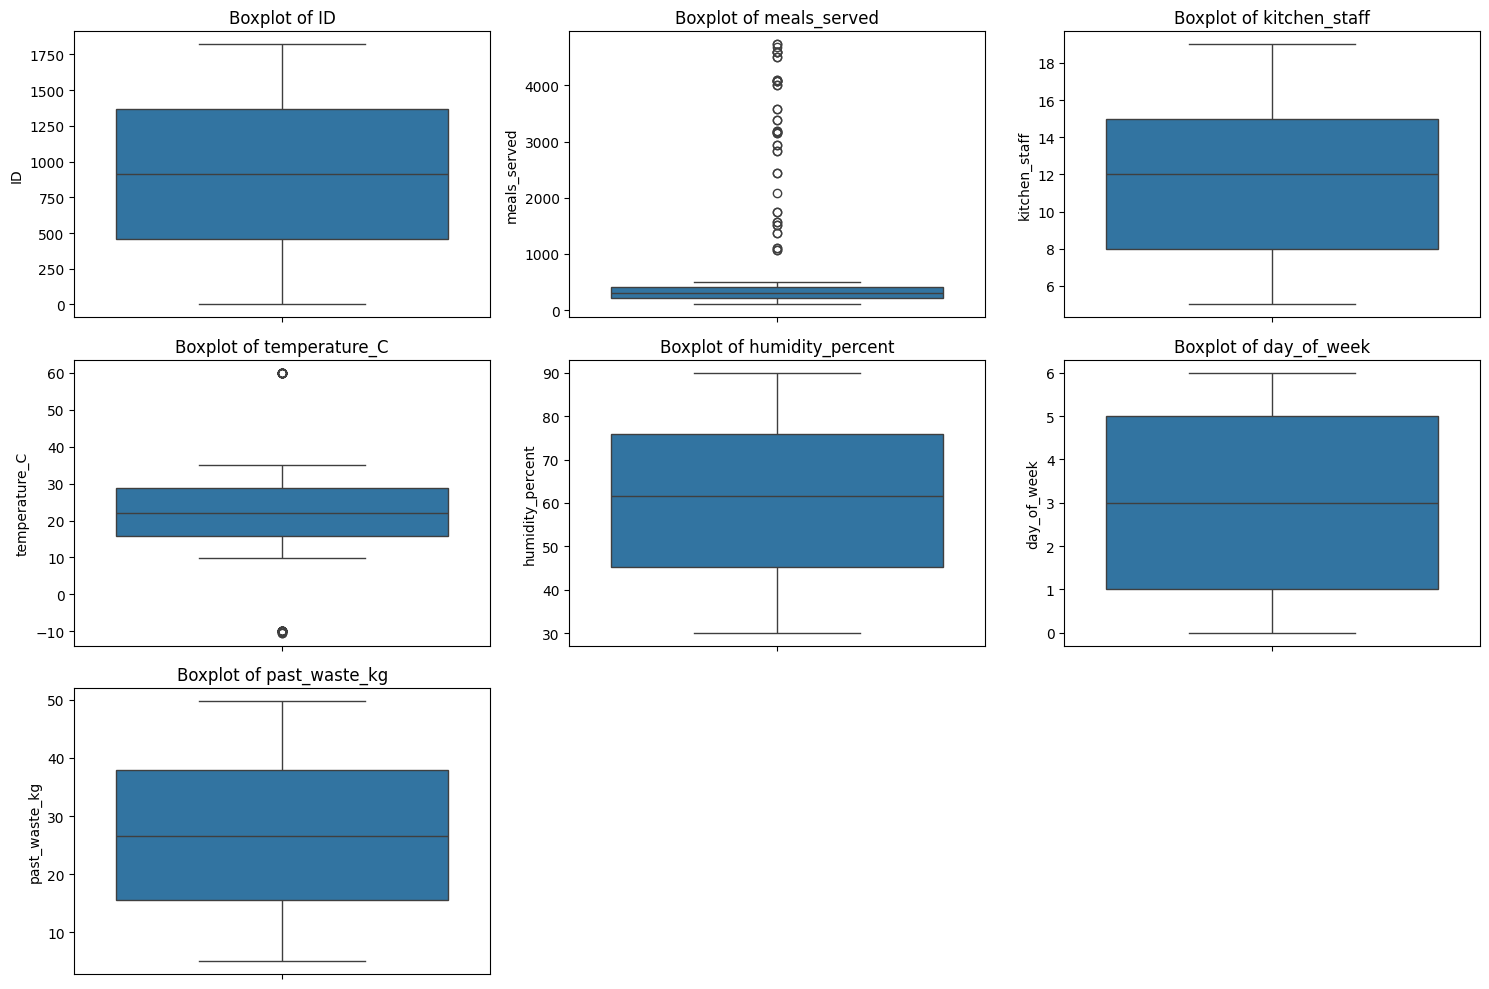

In [ ]:
import seaborn as sns
plt.figure(figsize=(15, 10))
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
Q1 = df['meals_served'].quantile(0.25)
Q3 = df['meals_served'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the actual outliers
outliers = df[(df['meals_served'] < lower_bound) | (df['meals_served'] > upper_bound)]

# Show the values of the outliers
print("Outlier values in 'meals_served':")
print(outliers['meals_served'])

Outlier values in 'meals_served':
Series([], Name: meals_served, dtype: float64)


In [ ]:
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

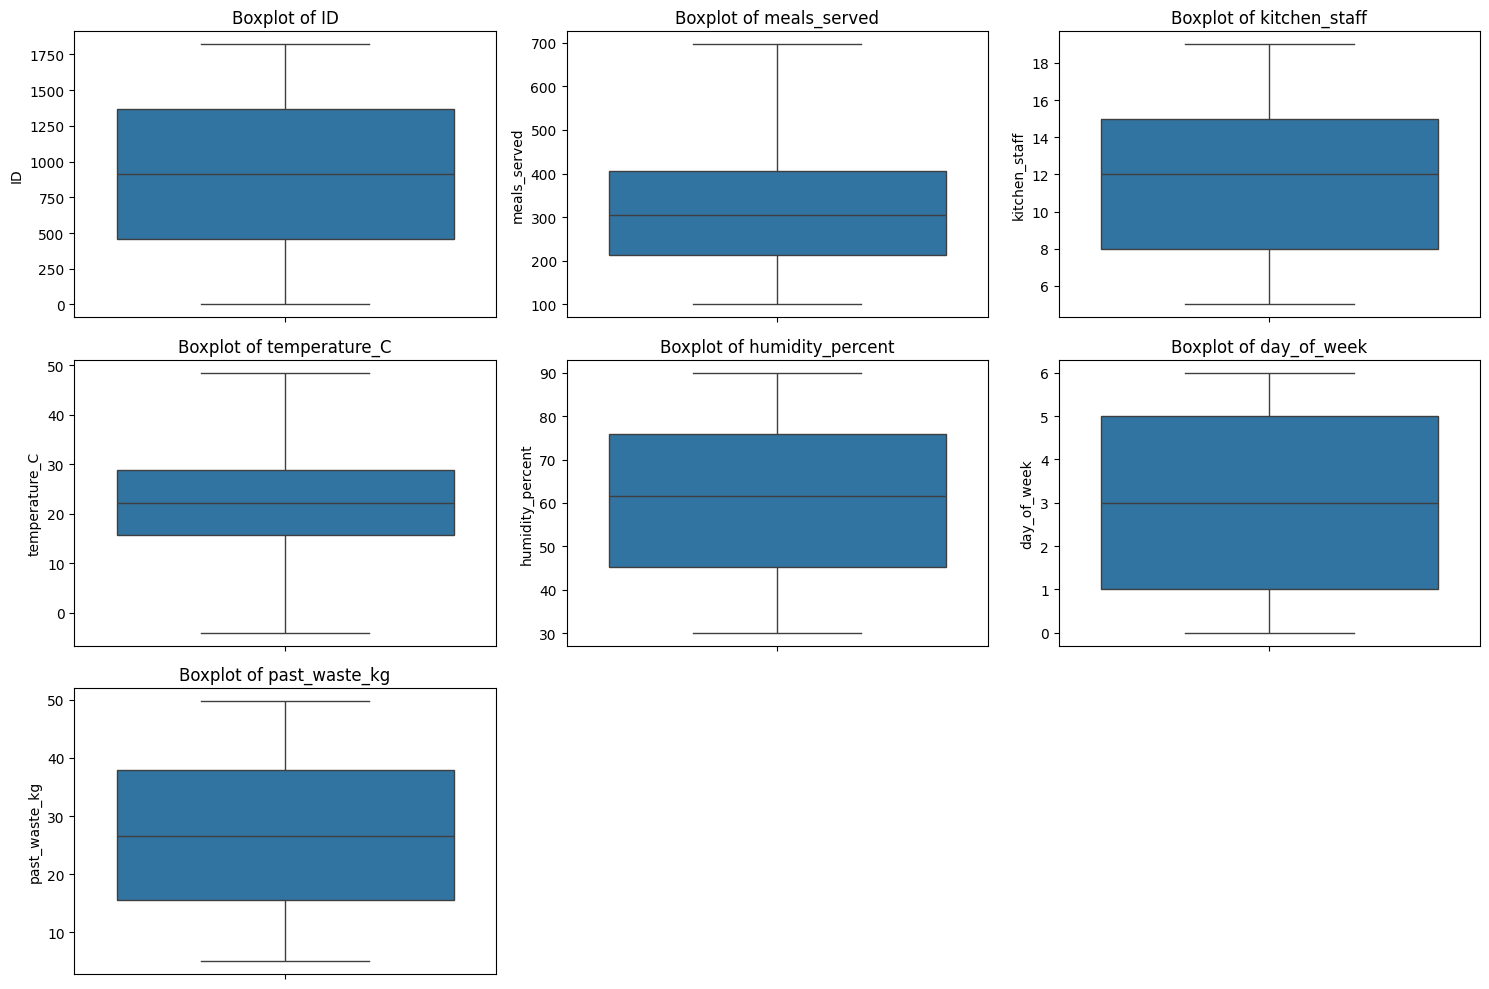

In [ ]:
import seaborn as sns
plt.figure(figsize=(15, 10))
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
########################################### Bar Plots ###################################################################

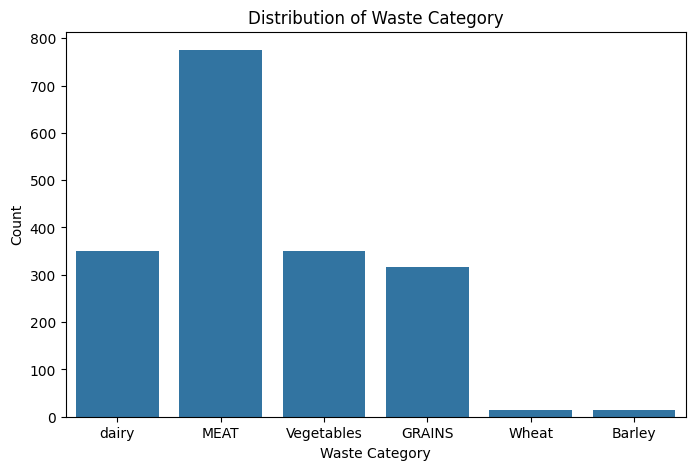

<ipython-input-81-3cea247f8ec9>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Waste Category')


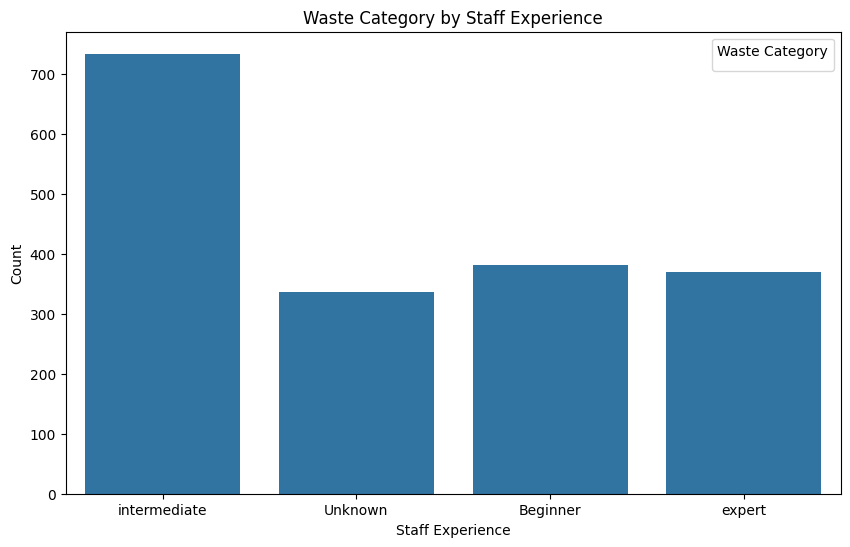

In [ ]:

plt.figure(figsize=(8, 5))
sns.countplot(x='waste_category', data=df)
plt.title('Distribution of Waste Category')
plt.xlabel('Waste Category')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='staff_experience', data=df)
plt.title('Waste Category by Staff Experience')
plt.xlabel('Staff Experience')
plt.ylabel('Count')
plt.legend(title='Waste Category')
plt.show()

In [ ]:
###########################################    Correlation Analysis   ###################################################################

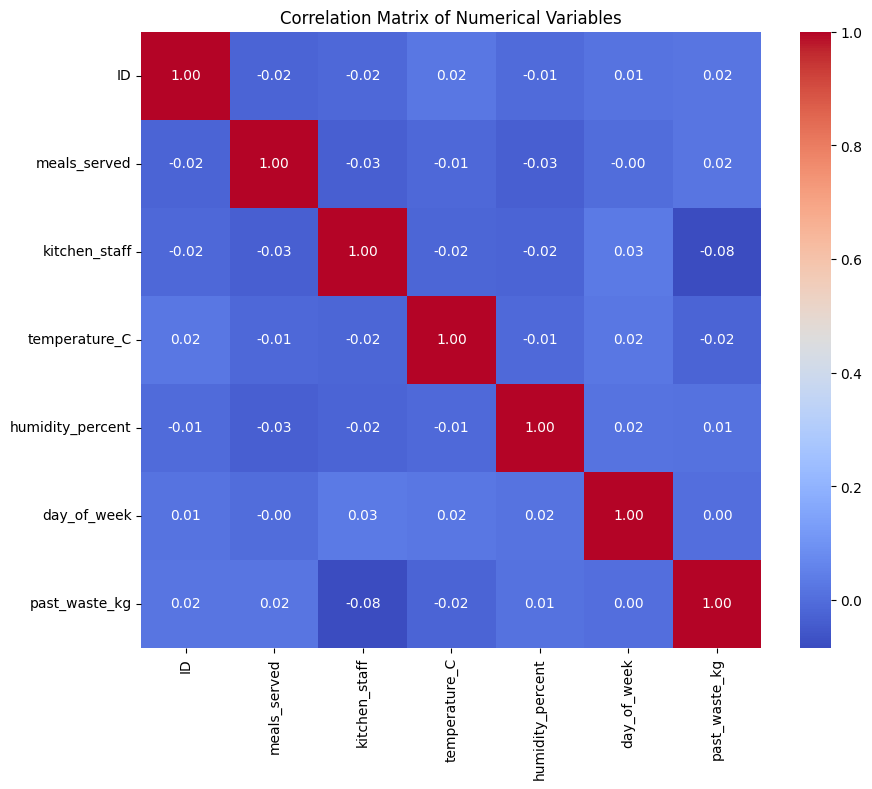

In [ ]:
# Select only numerical features
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Display correlation matrix
correlation_matrix = numeric_df.corr()

# Show it as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()
